In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive

Mounted at /content/drive
/content/drive/My Drive


In [ ]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import os
from os import listdir
from os.path import isfile, join
import os
import cv2
import dlib
import numpy as np

num_classes = 4
img_rows, img_cols = 48, 48
batch_size = 16

train_data_dir = './25. Face Recognition/faces/train'
validation_data_dir = './25. Face Recognition/faces/validation'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      shear_range=0.3,
      zoom_range=0.3,
      width_shift_range=0.4,
      height_shift_range=0.4,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

Found 2719 images belonging to 4 classes.
Found 955 images belonging to 4 classes.


In [ ]:
#Our Keras imports
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.layers.core import Activation, Flatten, Dropout, Dense

 Creating a simple VGG based model for Face Recognition

In [ ]:
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
class_labels

{0: 'Chandler', 1: 'Joey', 2: 'Pheobe', 3: 'Rachel'}

In [ ]:
# Import our libaries
from keras.models import Model, Sequential
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [ ]:

from keras.models import model_from_json
model.load_weights('./25. Face Recognition/vgg_face_weights.h5')

In [ ]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))


vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [ ]:
epsilon = 0.40

def verifyFace(img1, img2):
    img1_representation = vgg_face_descriptor.predict(preprocess_image('./25. Face Recognition/training_faces/%s' % (img1)))[0,:]
    img2_representation = vgg_face_descriptor.predict(preprocess_image('./25. Face Recognition/training_faces/%s' % (img2)))[0,:]
    
    cosine_similarity = findCosineSimilarity(img1_representation, img2_representation)
    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(image.load_img('./25. Face Recognition/training_faces/%s' % (img1)))
    plt.xticks([]); plt.yticks([])
    f.add_subplot(1,2, 2)
    plt.imshow(image.load_img('./25. Face Recognition/training_faces/%s' % (img2)))
    plt.xticks([]); plt.yticks([])
    plt.show(block=True)
    
    print("Cosine similarity: ",cosine_similarity)
    
    if(cosine_similarity < epsilon):
        print("They are same person")
    else:
        print("They are not same person!")

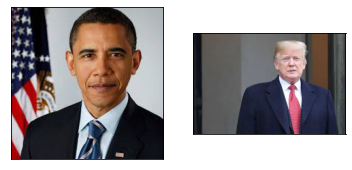

Cosine similarity:  0.5536709427833557
They are not same person!


In [ ]:
verifyFace("angelina.jpg", "angelina.jpg")

In [ ]:
# The code below extracts faces from images and places them in the folder
from os import listdir
from os.path import isfile, join
import cv2

# Loading out HAARCascade Face Detector 
face_detector = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

# Directory of image of persons we'll be extracting faces frommy
mypath = "./people/"
image_file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print("Collected image names")

for image_name in image_file_names:
    person_image = cv2.imread(mypath+image_name)
    face_info = face_detector.detectMultiScale(person_image, 1.3, 5)
    for (x,y,w,h) in face_info:
        face = person_image[y:y+h, x:x+w]
        roi = cv2.resize(face, (128, 128), interpolation = cv2.INTER_CUBIC)
    path = "./group_of_faces/" + "face_" + image_name 
    cv2.imwrite(path, roi)
    cv2.imshow("face", roi)
    
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#author Sefik Ilkin Serengil
#you can find the documentation of this code from the following link: https://sefiks.com/2018/08/06/deep-face-recognition-with-keras/

import numpy as np
import cv2

from keras.models import Model, Sequential
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt
from os import listdir

def preprocess_image(image_path):
    """Loads image from path and resizes it"""
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

def loadVggFaceModel():
    """Loads the VGGFace model defined in the function"""
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))

    #you can download pretrained weights from https://drive.google.com/file/d/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo/view?usp=sharing
    from keras.models import model_from_json
    model.load_weights('vgg_face_weights.h5')

    vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

    return vgg_face_descriptor

model = loadVggFaceModel()
print("Model Loaded")

In [ ]:
detector = dlib.cnn_face_detection_model_v1("../input/pretrained-models-faces/mmod_human_face_detector.dat")

def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.rect.left()
    y = rect.rect.top()
    w = rect.rect.right() - x
    h = rect.rect.bottom() - y

    # return a tuple of (x, y, w, h)
    return (x, y, w, h)

def dlib_corrected(data, data_type = 'train'):
    #We set the size of the image
    dim = (160, 160)
    data_images=[]
    #If we are processing training data we need to keep track of the labels
    if data_type=='train':
        data_labels=[]
    #Loop over all images
    for cnt in range(0,len(data)):
        image = data['img'][cnt]
        #The large images are resized
        if image.shape[0] > 1000 and image.shape[1] > 1000:
            image = cv2.resize(image, (1000,1000), interpolation = cv2.INTER_AREA)
        #The image is converted to grey-scales
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        #Detect the faces
        rects = detector(gray, 1)
        sub_images_data = []
        #Loop over all faces in the image
        for (i, rect) in enumerate(rects):
            #Convert the bounding box to edges
            (x, y, w, h) = rect_to_bb(rect)
            #Here we copy and crop the face out of the image
            clone = image.copy()
            if(x>=0 and y>=0 and w>=0 and h>=0):
                crop_img = clone[y:y+h, x:x+w]
            else:
                crop_img = clone.copy()
            #We resize the face to the correct size
            rgbImg = cv2.resize(crop_img, dim, interpolation = cv2.INTER_AREA)
            #In the test set we keep track of all faces in an image
            if data_type == 'train':
                sub_images_data = rgbImg.copy()
            else:
                sub_images_data.append(rgbImg)
        #If no face is detected in the image we will add a NaN
        if(len(rects)==0):
            if data_type == 'train':
                sub_images_data = np.empty(dim + (3,))
                sub_images_data[:] = np.nan
            if data_type=='test':
                nan_images_data = np.empty(dim + (3,))
                nan_images_data[:] = np.nan
                sub_images_data.append(nan_images_data)
        #Here we add the the image(s) to the list we will return
        data_images.append(sub_images_data)
        #And add the label to the list
        if data_type=='train':
            data_labels.append(data['class'][cnt])
    #Lastly we need to return the correct number of arrays
    if data_type=='train':
        return np.array(data_images), np.array(data_labels)
    else:
        return np.array(data_images)

In [ ]:
def get_embedding(model, face_pixels):
    # scale pixel values
    face_pixels = face_pixels.astype('float32')
    # standardize pixel values across channels (global)
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    # transform face into one sample
    samples = expand_dims(face_pixels, axis=0)
    # make prediction to get embedding
    yhat = model.predict(samples)
    return yhat[0]

model = load_model('../input/pretrained-models-faces/facenet_keras.h5')

svmtrainX = []
for index, face_pixels in enumerate(newTrainX):
    embedding = get_embedding(model, face_pixels)
    svmtrainX.append(embedding)

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

linear_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma=0.01, probability =True))
linear_model.fit(svmtrainX, svmtrainY)

In [ ]:
predicitons=[]
for i in corrected_test_X:    
    flag=0
    if(len(i)==1):
        embedding = get_embedding(model, i[0])
        tmp_output = linear_model.predict([embedding])
        predicitons.append(tmp_output[0])
    else:
        tmp_sub_pred = []
        tmp_sub_prob = []
        for j in i:
            j= j.astype(int)
            embedding = get_embedding(model, j)
            tmp_output = linear_model.predict([embedding])
            tmp_sub_pred.append(tmp_output[0])
            tmp_output_prob = linear_model.predict_log_proba([embedding])
            tmp_sub_prob.append(np.max(tmp_output_prob[0]))
            
        if 1 in tmp_sub_pred and 2 in tmp_sub_pred:
            index_1 = np.where(np.array(tmp_sub_pred)==1)[0][0]
            index_2 = np.where(np.array(tmp_sub_pred)==2)[0][0]
            if(tmp_sub_prob[index_1] > tmp_sub_prob[index_2] ):
                predicitons.append(1)
            else:
                predicitons.append(2)
        elif 1 not in tmp_sub_pred and 2 not in tmp_sub_pred:
            predicitons.append(0)
        elif 1 in tmp_sub_pred and 2 not in tmp_sub_pred:
            predicitons.append(1)
        elif 1 not in tmp_sub_pred and 2 in tmp_sub_pred:
            predicitons.append(2)